In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"]=[10,5]

warnings.simplefilter(action = "ignore", category = FutureWarning)

In [5]:
full_data = pd.read_csv("/content/titanic_dataset (1).csv")

In [6]:
full_data.shape

(891, 12)

In [7]:
full_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


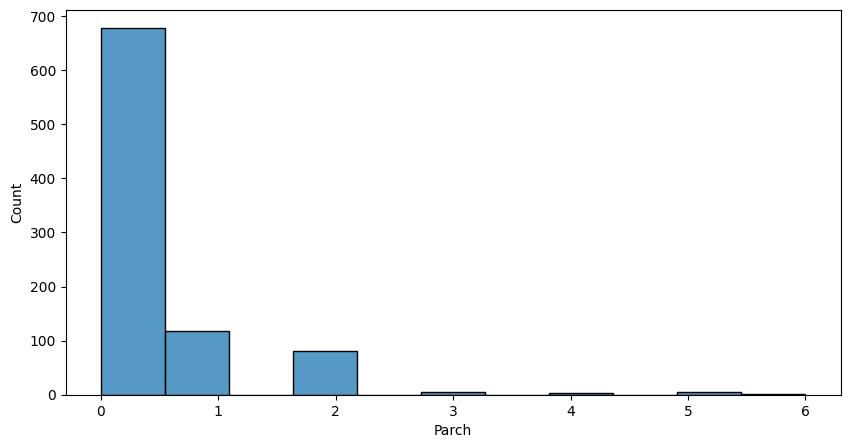

In [8]:
sns.histplot(full_data["Parch"],kde=False)
plt.show()

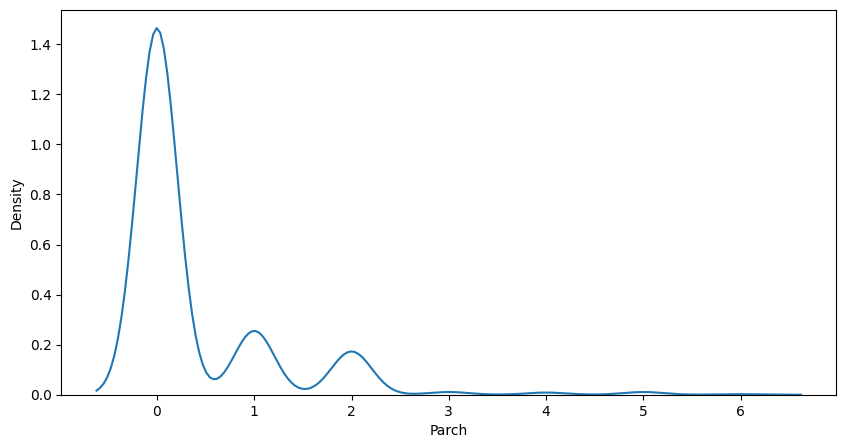

In [9]:
sns.distplot(full_data["Parch"],hist=False)
plt.show()

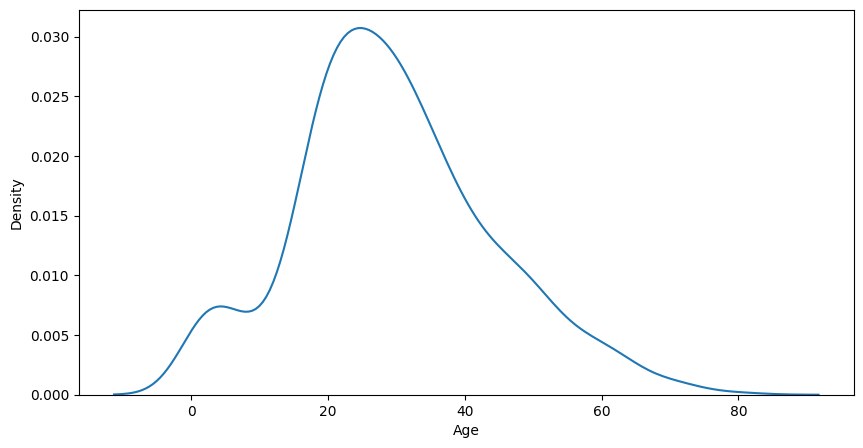

In [10]:
sns.distplot(full_data["Age"],hist=False)
plt.show()

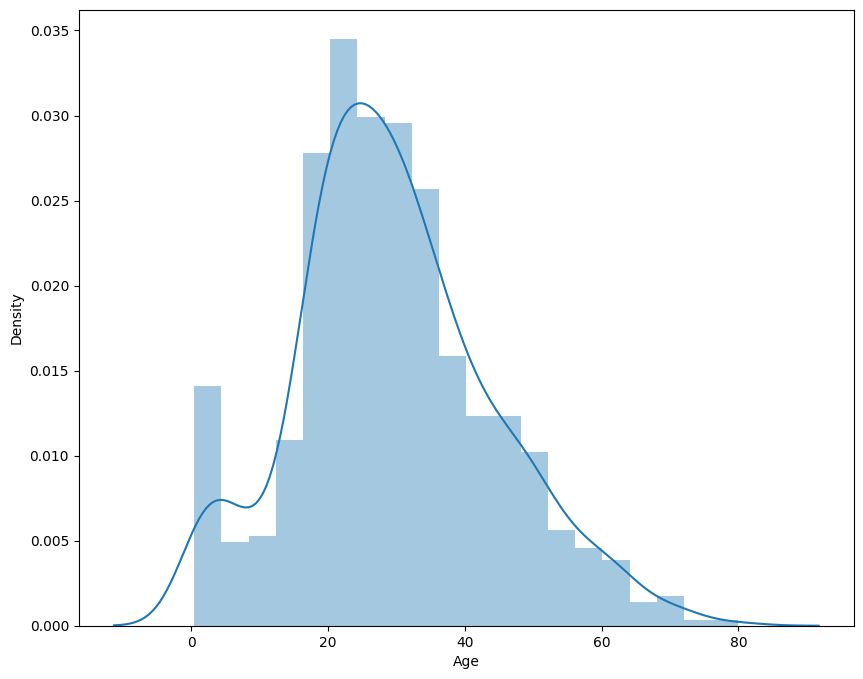

In [11]:
plt.figure(figsize=(10,8))
sns.distplot(full_data["Age"])
plt.show()

Import the Data
Let's extract the our Titanic data from the .csv file, create a pandas DataFrame and look at the available indicators:

Survived: Outcome of survival (0 = No; 1 = Yes)

Pclass: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)

Name: Name of passenger

Sex: Sex of the passenger

Age: Age of the passenger (Some entries contain NaN)

SibSp: Number of siblings and spouses of the passenger aboard

Parch: Number of parents and children of the passenger aboard

Ticket: Ticket number of the passenger

Fare: Fare paid by the passenger

Cabin: Cabin number of the passenger (Some entries contain NaN)

Embarked: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton

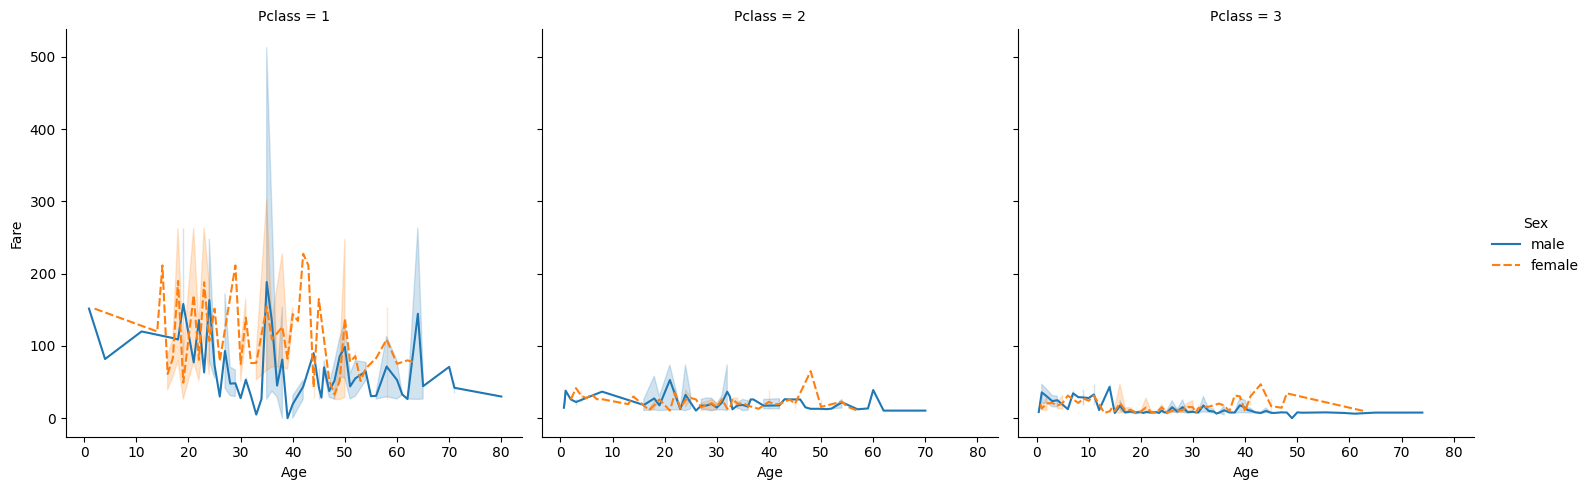

In [12]:
sns.relplot(x="Age",y="Fare",col="Pclass",hue="Sex",style="Sex",kind="line",data=full_data)
plt.show()

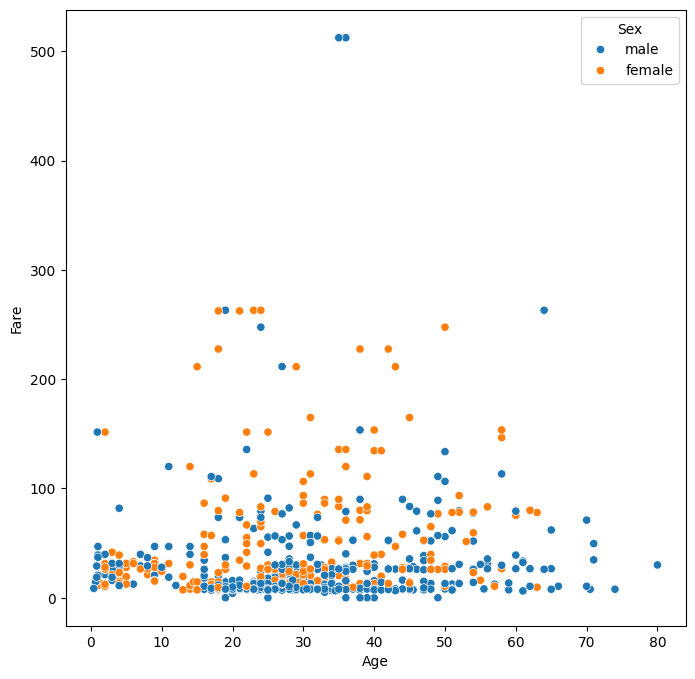

In [13]:
plt.figure(figsize=(8,8))
sns.scatterplot(x="Age",y="Fare",hue="Sex",data=full_data)
plt.show()

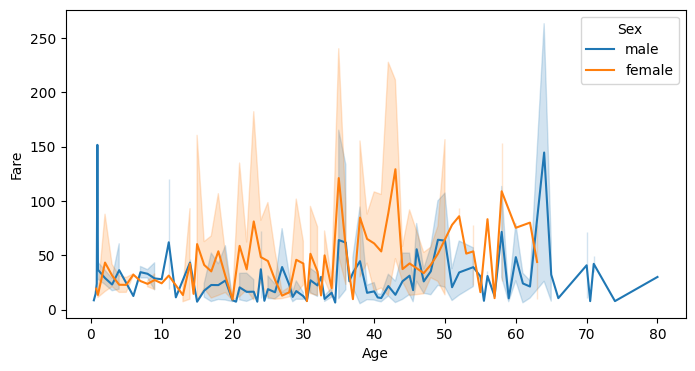

In [14]:
plt.figure(figsize=(8,4))
sns.lineplot(x="Age",y="Fare",hue="Sex",data=full_data)
plt.show()

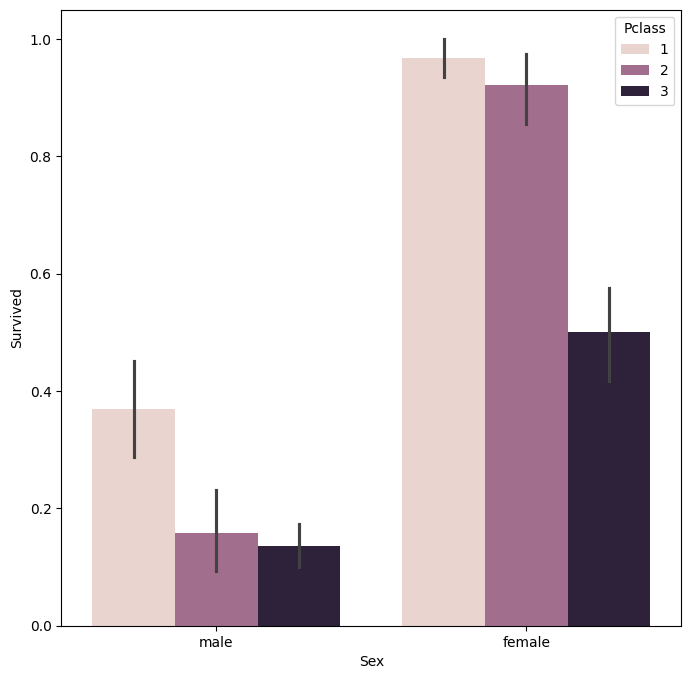

In [15]:
plt.figure(figsize=(8,8))
sns.barplot(x="Sex",y="Survived",hue="Pclass",data=full_data)
plt.show()

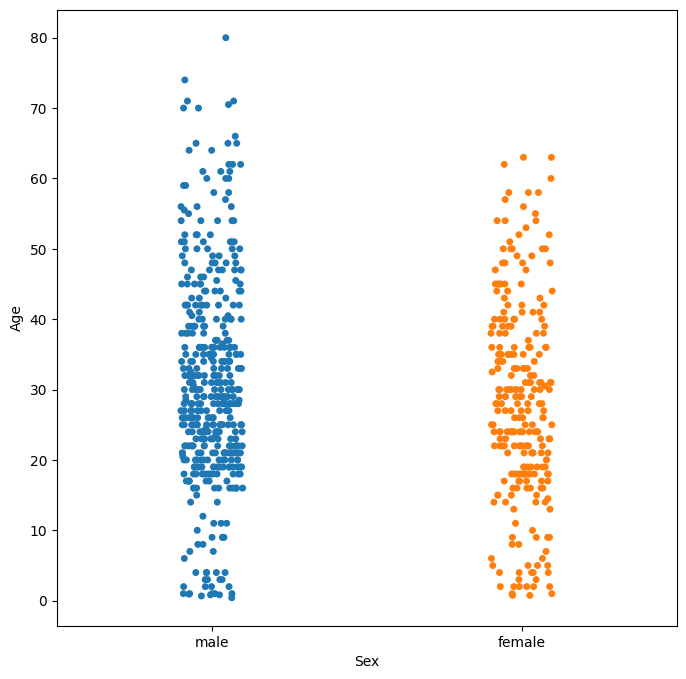

In [16]:
plt.figure(figsize=(8,8))
sns.stripplot(x="Sex",y="Age",hue="Sex",data=full_data)
plt.show()

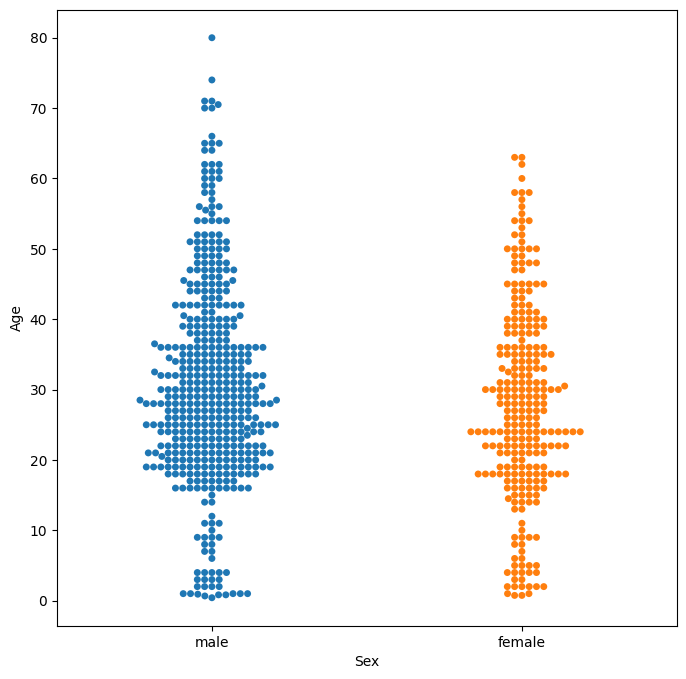

In [17]:
plt.figure(figsize=(8,8))
sns.swarmplot(x="Sex",y="Age",hue="Sex",data=full_data)
plt.show()

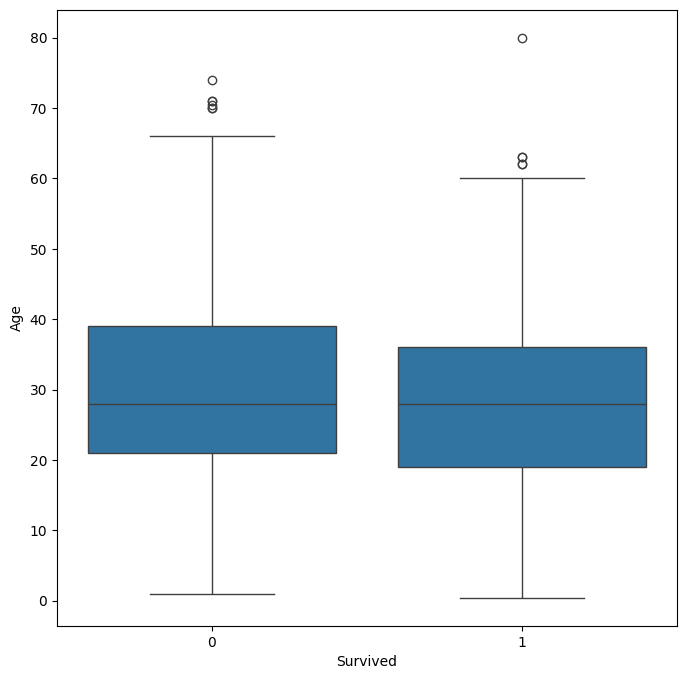

In [18]:
plt.figure(figsize=(8,8))
sns.boxplot(x="Survived",y="Age",data=full_data)
plt.show()

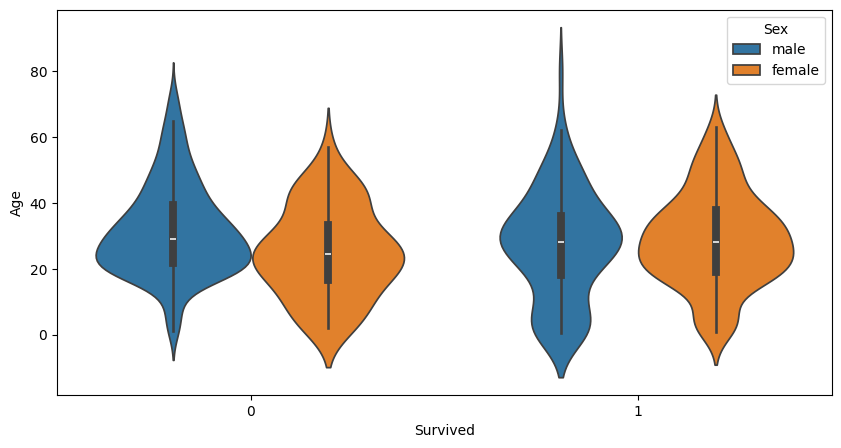

In [19]:
sns.violinplot(x="Survived",y="Age",hue="Sex",data=full_data)
plt.show()

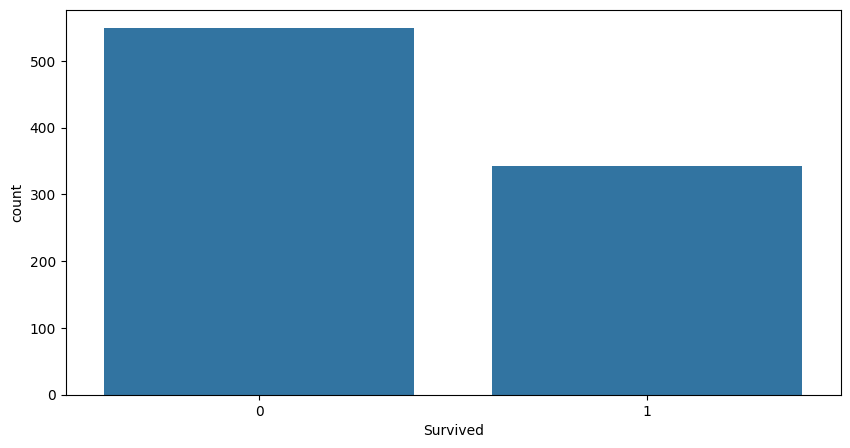

In [20]:
sns.countplot(x="Survived",data=full_data)
plt.show()

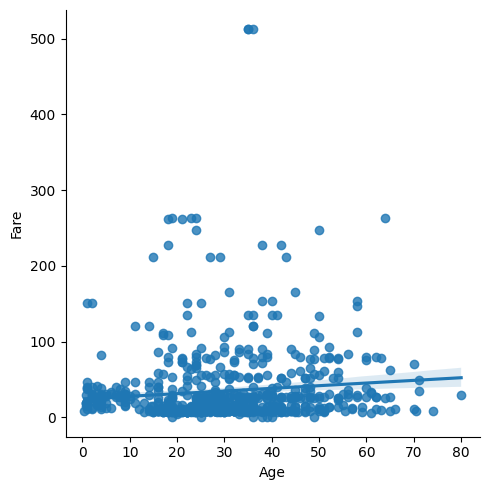

In [21]:
sns.lmplot(x="Age",y="Fare",data=full_data)
plt.show()

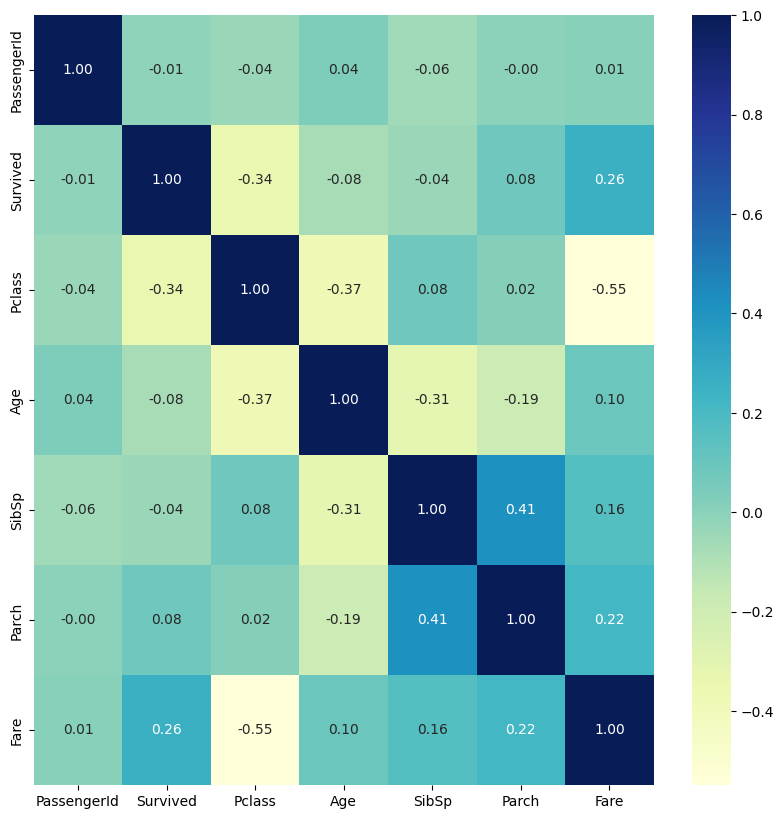

In [22]:
plt.subplots(figsize=(10,10))
sns.heatmap(full_data.corr(numeric_only=True), cmap = "YlGnBu", annot=True, fmt=".2f")
plt.show()

In [23]:
print("train Data",full_data.shape)

train Data (891, 12)


In [24]:
full_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
full_data.info(

)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


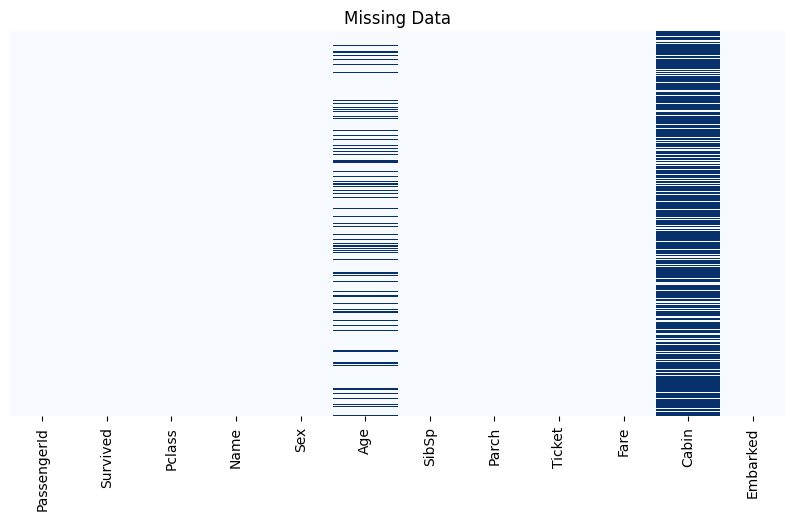

In [26]:
sns.heatmap(full_data.isnull(),yticklabels=False,cbar=False,cmap="Blues")
plt.title("Missing Data")
plt.show()

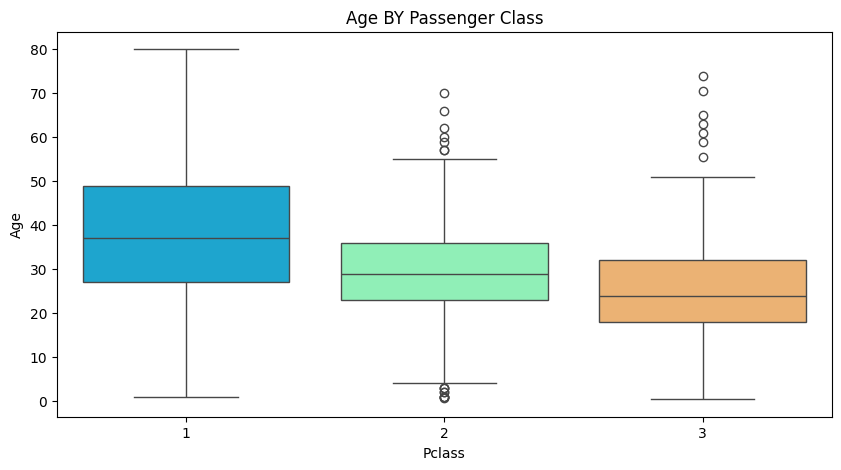

In [27]:
sns.boxplot(x="Pclass",y="Age",data=full_data,palette="rainbow").set_title("Age BY Passenger Class")
plt.show()

In [28]:
def impute_age(cols):
  Age=cols[0]
  Pclass=cols[1]

  if pd.isnull(Age):

    if Pclass==1:
      return 37
    elif Pclass==2:
      return 29
    else:
      return 24
  else:
    return Age

full_data["Age"]=full_data[["Age","Pclass"]].apply(impute_age,axis=1)

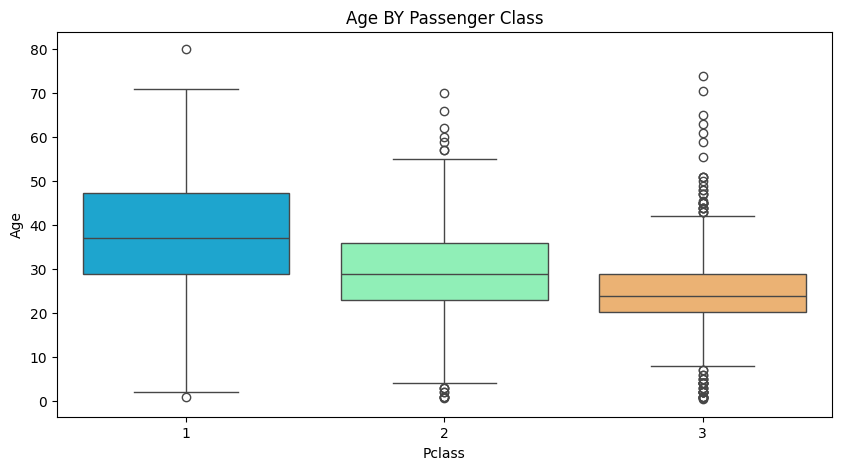

In [29]:
sns.boxplot(x="Pclass",y="Age",data=full_data,palette="rainbow").set_title("Age BY Passenger Class")
plt.show()

In [30]:
full_data.drop("Cabin",axis=1,inplace=True)

In [31]:
full_data.dropna(inplace=True)

In [32]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [33]:
full_data.drop(["Name","Ticket"],axis=1,inplace=True)
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


In [34]:
objact = ["Sex","Embarked"]
for colname in objact:
  full_data[colname]=full_data[colname].astype("category")

full_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  889 non-null    int64   
 1   Survived     889 non-null    int64   
 2   Pclass       889 non-null    int64   
 3   Sex          889 non-null    category
 4   Age          889 non-null    float64 
 5   SibSp        889 non-null    int64   
 6   Parch        889 non-null    int64   
 7   Fare         889 non-null    float64 
 8   Embarked     889 non-null    category
dtypes: category(2), float64(2), int64(5)
memory usage: 57.5 KB


In [35]:
full_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.019314,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,13.209814,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,36.500000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [36]:
full_data.drop("PassengerId",inplace=True,axis=1)

In [37]:
full_data.shape

(889, 8)

In [38]:
full_data.select_dtypes(["category"]).columns

Index(['Sex', 'Embarked'], dtype='object')

In [39]:
sex = pd.get_dummies(full_data["Sex"],drop_first = True)
embark = pd.get_dummies(full_data["Embarked"],drop_first=True)


In [40]:
full_data = pd.concat([full_data,sex,embark],axis=1)
full_data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,True,False,True
1,1,1,female,38.0,1,0,71.2833,C,False,False,False
2,1,3,female,26.0,0,0,7.9250,S,False,False,True
3,1,1,female,35.0,1,0,53.1000,S,False,False,True
4,0,3,male,35.0,0,0,8.0500,S,True,False,True


In [41]:
full_data.drop(["Sex","Embarked"],axis=1,inplace=True)
print("Train Data Shape " ,full_data.shape)
full_data.head(5)

Train Data Shape  (889, 9)


,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [42]:
x = full_data.drop("Survived",axis=1)
y = full_data["Survived"]
x.shape


(889, 8)

In [43]:
y.shape

(889,)

In [44]:
from sklearn import preprocessing
pre_process = preprocessing.StandardScaler()
x_transform = pre_process.fit_transform(x)

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(x,y,test_size = .20 , random_state= 101)

In [46]:
X_train.shape

(711, 8)

In [47]:
y_train.shape

(711,)

In [48]:
X_test.shape

(178, 8)

In [49]:
y_test.shape

(178,)

In [50]:
from sklearn.linear_model import LogisticRegression
print("Logistic Regression")

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

Logistic Regression


LogisticRegression()

In [51]:
from sklearn.metrics import accuracy_score

y_pred_log_reg = log_reg.predict(X_test)

print("Accuracy Score")
print(accuracy_score(y_test,y_pred_log_reg))


Accuracy Score
0.8202247191011236


In [53]:
from sklearn.tree import DecisionTreeClassifier
print("Decison Tree Classifier")
Dtree = DecisionTreeClassifier()
Dtree.fit(X_train , y_train)

Decison Tree Classifier


DecisionTreeClassifier()

In [54]:
y_pred_Dtree = Dtree.predict(X_test)
print("Decision Tree Classifier ")
print('--'*30)
D_tree_Accuracy = round(accuracy_score(y_test,y_pred_Dtree)*100,2)
print("Accuracy ", D_tree_Accuracy,"%")

Decision Tree Classifier 
------------------------------------------------------------
Accuracy  78.65 %


In [56]:
from sklearn.ensemble import RandomForestClassifier

print("Random Forest Clasifier")

rfc = RandomForestClassifier()

rfc.fit(X_train,y_train)

Random Forest Clasifier


RandomForestClassifier()

In [58]:
y_pred_rfc = rfc.predict(X_test)
print("Random Forest Classifier")
print("--"*30)
rfc_Accuracy = round(accuracy_score(y_test,y_pred_rfc)*100,2)
print("Accuracy",rfc_Accuracy,"%")

Random Forest Classifier
------------------------------------------------------------
Accuracy 82.58 %


In [59]:
from sklearn.ensemble import GradientBoostingClassifier

print("Gradient Boosting Classifier")

gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)

Gradient Boosting Classifier


GradientBoostingClassifier()

In [60]:
y_pred_gbc = gbc.predict(X_test)
print("Gradient Boosting Classifier")
print("--"*30)
gbc_Accuracy = round(accuracy_score(y_test, y_pred_gbc )*100,2)
print("Accuracy",gbc_Accuracy,"%")

Gradient Boosting Classifier
------------------------------------------------------------
Accuracy 84.27 %
